## Processing sensor data from Shale Hills CZO SPMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors
- OTT Pluvio rain gauge
- Custom built well
- nested-suction lysimeter (1900 series, SoilMoisture Equipment Corp., Santa Barbara, CA)
- ThiesCLIMA Laser Precipitation Monitor (LPM)


In [2]:
import os
os.chdir('C:/Users/marcb')
os.getcwd()

'C:\\Users\\marcb'

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Import color palettes
from palettable.colorbrewer.sequential import Blues_6 as AP_colors # O2
from palettable.colorbrewer.sequential import YlGn_6 as GP_colors # CO2
#from palettable.colorbrewer.sequential import YlOrBr_6 as SM_colors # Soil Moisture

# Define colors, depths and installtion material 
#Apogee SO-110
AP_colors = AP_colors.hex_colors[1:]
AP_depths = {1: 30, 2: 140}

#eosGP
GP_colors = GP_colors.hex_colors[1:]
GP_depths = {1: 30, 2: 140} # Note: eosGP1 may not be at 40cm


# Define filenames
infile1 = "Desktop/CO2 Data/raw_data/Shale Hills/SPMS/SPMS_CO2_O2.csv" 
infile2 = "Desktop/CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_precipitation.csv" 
infile3 = "Desktop/CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_pCO2.csv" 
infile4 = "Desktop/CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_Geochem_2006_11.csv" 

# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1, na_values='NAN', parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN', parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN', parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN', parse_dates=[0], index_col=0) 



In [15]:
#merge dataframes and drop record columns
#df=pd.concat([df1,df2], sort=False)
df.drop(columns="RECORD")


,DiffVolt_1,DiffVolt_2,O2_30,O2_140,T109_1_C,T109_2_C,CO2_30_lo,CO2_30_hi,CO2_30_temp,CO2_140_lo,CO2_140_hi,CO2_140_temp
TmStamp,,,,,,,,,,,,
2017-02-20 15:00:00,0.607000,42.919998,-0.903000,17.559999,2.689,3.773,8.108109,32.432430,9.750000,4835.1362,5070.2710,10.570000
2017-02-20 16:00:00,44.570000,42.950001,18.030001,17.570000,2.688,3.771,2.702703,5.405406,9.550000,4846.6221,5070.2710,10.210000
2017-02-20 17:00:00,45.700001,42.939999,18.510000,17.570000,2.705,3.766,5.405406,10.810810,9.780000,4867.5679,5032.4331,10.290000
2017-02-20 18:00:00,45.830002,42.900002,18.570000,17.549999,2.704,3.787,8.108109,32.432430,10.100000,4905.4058,5167.5679,10.480000
2017-02-20 19:00:00,45.770000,42.900002,18.540001,17.549999,2.697,3.780,3.378379,8.108109,9.790000,4866.8931,5010.8110,10.510000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-02 10:00:00,41.500000,37.790001,16.700001,15.320000,15.020,14.800,5021.918900,20114.711000,15.890000,5039.4932,40305.1290,16.100000
2018-10-02 11:00:00,41.459999,37.790001,16.690001,15.320000,15.030,14.790,5021.689000,20113.789000,15.790000,5039.2622,40303.2810,15.620000
2018-10-02 12:00:00,41.459999,37.790001,16.690001,15.320000,15.060,14.790,5021.914100,20114.689000,16.040001,5034.7568,40256.4300,16.110001


In [60]:
#Rename all columns for df1 with format "var_depth.unit" 
#mask erroneous values in df1

df1.columns=["Record", "DiffVolt_30cm.mV", "DiffVolt_140cm.mV", "SoilO2_30cm.percent.0-100", "SoilO2_140cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_140cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_140cm.ppm", "CO2hi_140cm.ppm", "GPTemp_140cm.deg.C"]
df1.mask(df1<=-1, inplace=True)
df1["DiffVolt_30cm.mV"].mask(df1["DiffVolt_30cm.mV"]>=100, inplace=True)
#for i, x in enumerate (df1["ApogeeTemp_30cm.deg.C "]):
    #if df1["ApogeeTemp_30cm.deg.C "].diff(i)>3:
    #    x=np.nan
    #else:
    #    x=x
    #if abs(x[i+1])>=abs(x[i])+3:
        #x=np.nan
#for x in df1["ApogeeTemp_30cm.deg.C"]:
    


In [5]:
#Rename all columns for df2 with format "var_depth.unit" 
#mask erroneous values in df2
df2.columns=["Precipitation.mm", "Device", "Correlation", "Comment"]
df2

,Precipitation.mm,Device,Correlation,Comment
TmStamp,,,,
2006-01-01,0.7,OTT,NO,NaN
2006-01-02,12.1,OTT,NO,NaN
2006-01-03,1.9,OTT,NO,NaN
2006-01-04,1.0,OTT,NO,NaN
2006-01-05,2.0,OTT,NO,NaN
...,...,...,...,...
2018-12-27,0.0,OTT Pluvio392,No,NaN
2018-12-28,0.0,OTT Pluvio393,No,NaN
2018-12-29,15.7,OTT Pluvio394,No,NaN


In [6]:
#Rename all columns for df3 with format "var_depth.unit" 
#mask erroneous values in df3
df3

,Site (2),Sample Collection Date,Sample Collection Time,Tech,Depth (m),Elevation (m),pCO2 (ppmv)
Site (1),,,,,,,
SPVF,P1,8/29/2008,10:00-14:00,LJ/NK,0.0,280.0,427.0
SPVF,P1,8/29/2008,10:00-14:00,LJ/NK,0.1,280.0,605.0
SPVF,P1,8/29/2008,10:00-14:00,LJ/NK,0.3,280.0,2833.0
SPVF,P1,8/29/2008,10:00-14:00,LJ/NK,0.5,280.0,1574.0
SPVF,P1,8/29/2008,10:00-14:00,LJ/NK,0.7,280.0,4727.0
...,...,...,...,...,...,...,...
SSRT,S9,8/5/2010,NaN,BC,0.0,304.0,407.0
SSRT,S9,8/5/2010,NaN,BC,0.1,304.0,589.0
SSRT,S9,8/5/2010,NaN,BC,0.2,304.0,1487.0


In [7]:
#Rename all columns for df4 with format "var_depth.unit" 
#mask erroneous values in df4
df4

,SampleDate,SampleNumber,SiteCode,Depth,DOC,WaterTemp,pH,Alkalinity,Chloride,Nitrate,...,Strontium,IronIII,Manganese,Nickel,Phosphorus,Vanadium,Zinc,Barium,Delta_2Hydrogen,Delta_18Oxygen
RecordNum,,,,,,,,,,,,,,,,,,,,,
1,2006-09-23,NaN,SPVF,20,-9999.0,-9999.0,-9999.00,-9999.0,97.67362,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
2,2006-09-23,NaN,SPVF,30,-9999.0,-9999.0,-9999.00,-9999.0,114.47380,2.625210,...,2.853230,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
3,2006-09-23,NaN,SPVF,40,-9999.0,-9999.0,-9999.00,-9999.0,81.48631,1.486332,...,2.853230,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
4,2006-09-23,NaN,SPVF,60,-9999.0,-9999.0,-9999.00,-9999.0,55.74526,5.414496,...,0.342388,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
5,2006-09-23,NaN,SPMS,20,-9999.0,-9999.0,-9999.00,-9999.0,17.86372,25.354510,...,0.228258,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2011-10-20,KB11-554,SPVF,10,-9999.0,-9999.0,5.29,-9999.0,-9999.00000,-9999.000000,...,0.091327,0.000239,0.067004,-9999.0,0.012337,-9999.0,1.112250,-9999.0,-9999.0,-9999.0
2405,2011-10-20,KB11-555,SPVF,40,-9999.0,-9999.0,5.54,-9999.0,-9999.00000,-9999.000000,...,0.103166,0.003763,0.000000,-9999.0,0.000000,-9999.0,0.060082,-9999.0,-9999.0,-9999.0
2406,2011-10-20,KB11-556,SPVF,60,-9999.0,-9999.0,5.90,-9999.0,-9999.00000,-9999.000000,...,0.117380,0.294051,0.089595,-9999.0,0.956644,-9999.0,0.264015,-9999.0,-9999.0,-9999.0


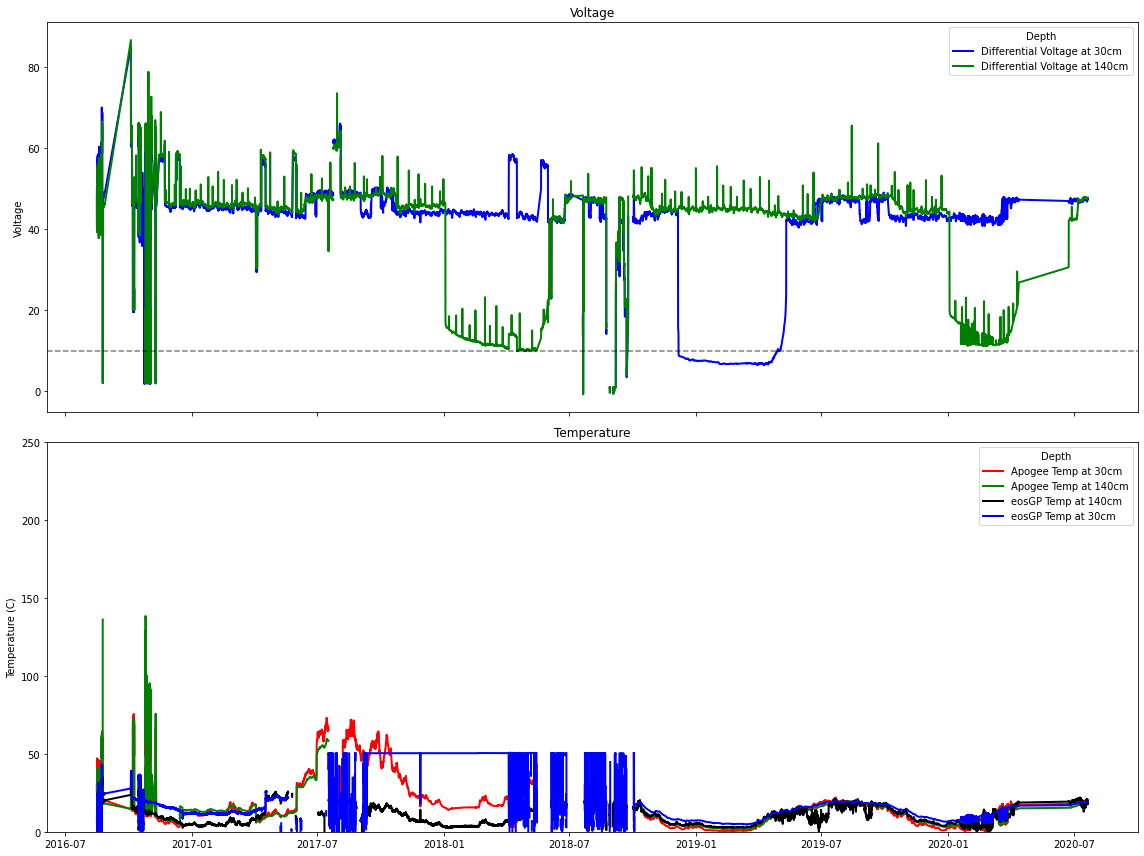

In [63]:
# Plot the datalogger parameters: battery voltage, panel temperature, enclosure temperature, and barometric pressure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df1.index, df1['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df1.index, df1['DiffVolt_140cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures
#  - for some reason I can't use df['ApogeeTemp_30cm.deg.C'] and have to instead use df.iloc[:,6]
#  - The data for Apogee Temp at 140cm seems to be all messed up
ax2.plot(df1.index, df1["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df1.index, df1["ApogeeTemp_140cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df1.index, df1['GPTemp_140cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df1.index, df1['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,250])
ax2.legend(title='Depth', loc='best')


In [7]:
#Correct Apogee SO-110 O2 data
# - Apogee data has already been calibrated, although it is in percent saturation. Should we switch to ppm, or is this fine? 
#cal_fac = 0.379
#offset = 1.14
#df['SoilO2_30cm.kPa'] = cal_fac*df['SoilO2_30cm.percent.0-100'] - offset # Convert from mV to kPa
#df['SoilO2_140cm.kPa'] = cal_fac*df['SoilO2_140cm.percent.0-100'] - offset

NameError: name 'df' is not defined

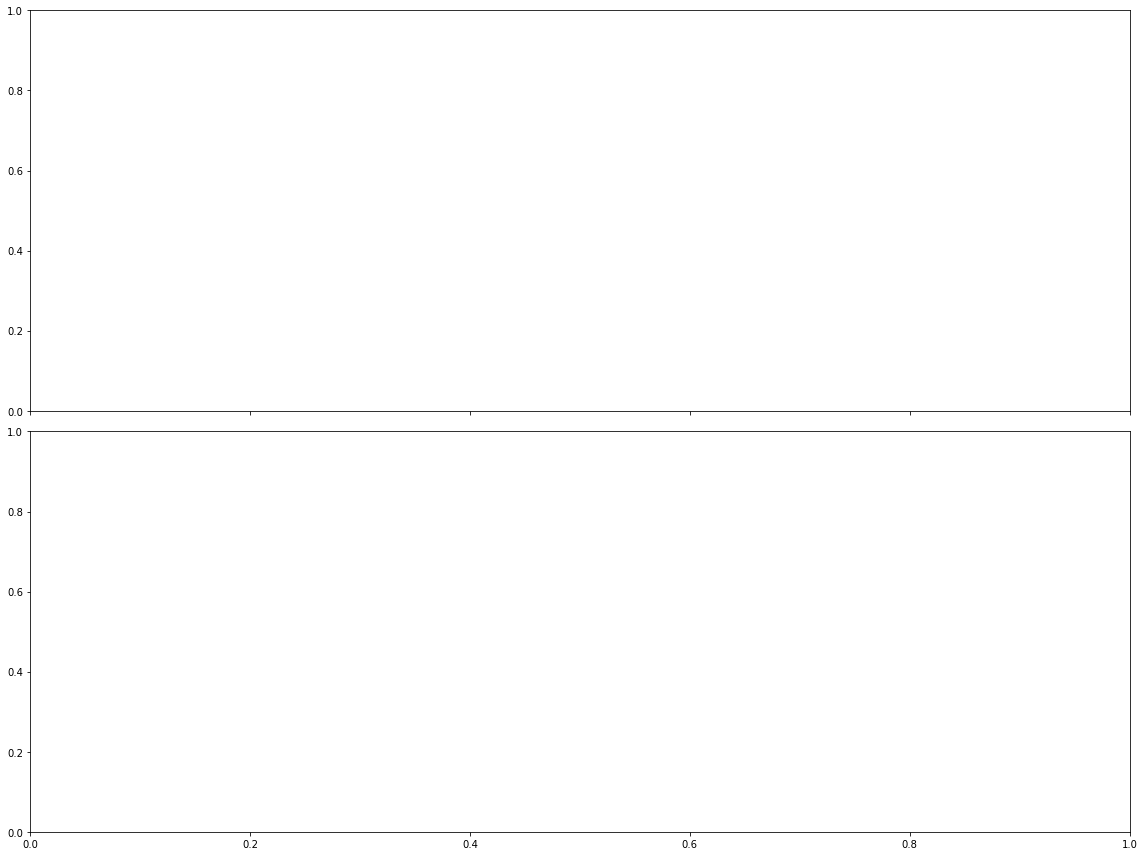

In [58]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df1.index, df.iloc[:,6], 'b', linewidth=2)
ax1.set(ylabel='Temperature (C)', title='Apogee Temperature at 30cm')

ax2.plot(df1.index, df['SoilO2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df1.index, df['SoilO2_140cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')

#df['Apogee_CorrO2_Avg'] = df['SoilO2_30cm.kPa']/df['BarometricPress_Avg']*100
#ax3.plot(df.index, df['Apogee_CorrO2_Avg'], 'k', linewidth=2)
#ax3.set(ylabel='Oxygen (%)', title='Apogee O2 Concentration');

No handles with labels found to put in legend.


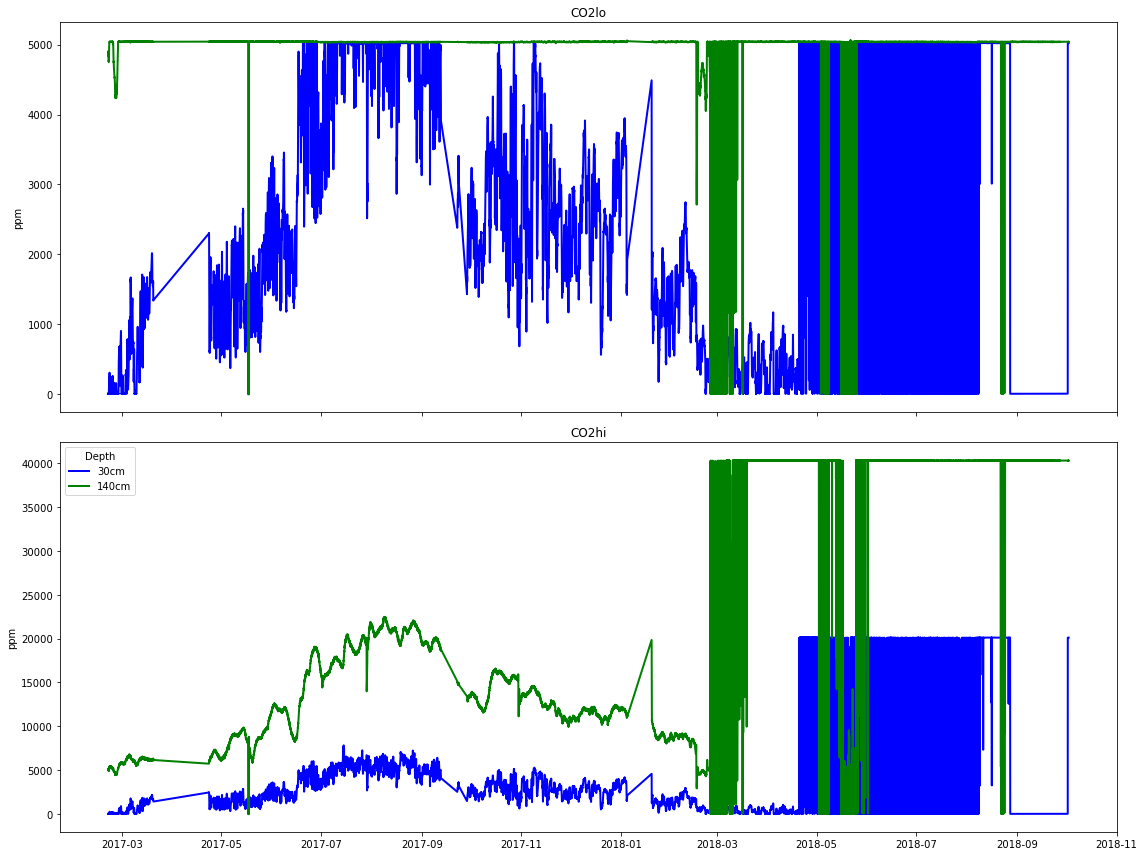

In [42]:
#Correct CO2 data 
#  - I can't seem to figure out how to account for the two different calibrations. 
#    I tried to make a new combined variable that is equal to CO2lo when CO2hi is below 5000,
#    and equal to CO2hi when CO2 is above 5000, but I can't seem to make it work. Also, I'm not 
#    sure if this is even a viable approach to the lo+hi calibration issue.
#if df['CO2hi_30cm.ppm']<5000:
#    df['CO2_30cm.ppm']=df['CO2lo_30cm.ppm']
#else:
#    df['CO2_30cm.ppm']=df['CO2hi_30cm.ppm']

#df['CO2_30cm.ppm']=df['CO2lo_30cm.ppm'].where(df['CO2hi_30cm.ppm']<5000)+df['CO2hi_30cm.ppm'].where(df['CO2lo_30cm.ppm']>5000)

#df['CO2_30cm.ppm,']=df['CO2lo_30cm.ppm']+df['CO2hi_30cm.ppm']


fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2lo')
ax2.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df.index, df['CO2hi_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')

In [48]:
output=df.copy()
today = dt.date.today()
outfile = 'Desktop/CO2 Data/processed_data/Shale Hills/LRMS/LRMS_CO2_O2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [46]:
output

,Record,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C
TmStamp,,,,,,,,,,,,,
2017-02-20 15:00:00,0,NaN,42.919998,NaN,17.559999,2.689,3.773,8.108109,32.432430,9.750000,4835.1362,5070.2710,10.570000
2017-02-20 16:00:00,1,44.570000,42.950001,18.030001,17.570000,2.688,3.771,2.702703,5.405406,9.550000,4846.6221,5070.2710,10.210000
2017-02-20 17:00:00,2,45.700001,42.939999,18.510000,17.570000,2.705,3.766,5.405406,10.810810,9.780000,4867.5679,5032.4331,10.290000
2017-02-20 18:00:00,3,45.830002,42.900002,18.570000,17.549999,2.704,3.787,8.108109,32.432430,10.100000,4905.4058,5167.5679,10.480000
2017-02-20 19:00:00,4,45.770000,42.900002,18.540001,17.549999,2.697,3.780,3.378379,8.108109,9.790000,4866.8931,5010.8110,10.510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-02 10:00:00,114,41.500000,37.790001,16.700001,15.320000,15.020,14.800,5021.918900,20114.711000,15.890000,5039.4932,40305.1290,16.100000
2018-10-02 11:00:00,115,41.459999,37.790001,16.690001,15.320000,15.030,14.790,5021.689000,20113.789000,15.790000,5039.2622,40303.2810,15.620000
2018-10-02 12:00:00,116,41.459999,37.790001,16.690001,15.320000,15.060,14.790,5021.914100,20114.689000,16.040001,5034.7568,40256.4300,16.110001
